### Model Training

Mean Squared Error: 2.388632911257127e-19


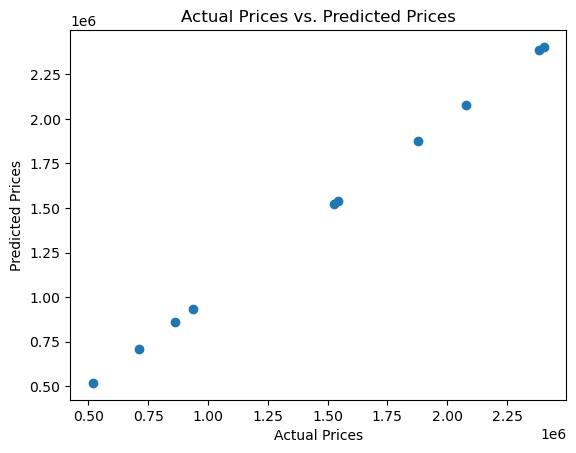

['trained_model_all_data.joblib']

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

df = pd.read_csv('model.csv')

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

X = df[['Location', 'Area', 'Crime Rate']]
y = df['Price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the entire dataset
model.fit(X, y)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Evaluate the model (optional, for reference)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize predictions vs. actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

result_df = pd.DataFrame({'Actual Prices': y, 'Predicted Prices': y_pred})

result_df.to_csv('predicted_prices_all.csv', index=False)

# Save the trained model to a file
joblib.dump(model, 'trained_model_all_data.joblib')

### Records

In [7]:
# Load the trained model
model = joblib.load('trained_model_all_data.joblib')

new_data = pd.read_csv('land_price_data.csv') 

X_new = new_data[['Location', 'Area', 'Crime Rate']]

X_new = pd.get_dummies(X_new)

# Ensure that the columns in X_new match the columns used during training
missing_cols = set(X.columns) - set(X_new.columns)
for col in missing_cols:
    X_new[col] = 0

# Reorder columns to match the order during training
X_new = X_new[X.columns]

# Make predictions using the trained model
y_pred_new = model.predict(X_new)

# Add the predicted prices to the new dataset
new_data['Predicted Prices'] = y_pred_new

new_data.to_csv('ml_generated_price.csv', index=False)